In [ ]:
import json
import glob
import pandas as pd

# adjust path to directory where files are downloaded


records = []

for file in glob.glob("exp_results/*.json"):
    with open(file) as f:
        data = json.load(f)
        record = {
            "algorithm": data["algorithm"],
            "sequential_time": data["sequential"]["time_taken"],
            "parallel_time": data["parallel"]["time_taken"],
            "speed_up": data["parallel"]["speed_up"],
            "efficiency": data["parallel"]["efficiency"],
            "n_processors": data["n_processors"],
            "epochs": data["n_epochs"],
            "population": data["pop_size"],
            "generation": data["gen"],
            "equation": data["ec"],
            "parallel_best": data["parallel"]["epochs"][-1]["best_value"],
            "sequential_best": data["sequential"]["best_value"],
        }
        records.append(record)

df = pd.DataFrame.from_records(records)

df1 = df[(df['equation'] == '1')]

df2 = df[(df['equation'] == '2')]

df3 = df[(df['equation'] == '3')]


'''print("Summary of first few rows:")
print(df)

print("Summary statistics:")
print(df.describe())  '''


'print("Summary of first few rows:")\nprint(df)\n\nprint("Summary statistics:")\nprint(df.describe())  '

In [52]:
df1['epochs'] = df1['epochs'].replace(8,3)

C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\238469334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['epochs'] = df1['epochs'].replace(8,3)


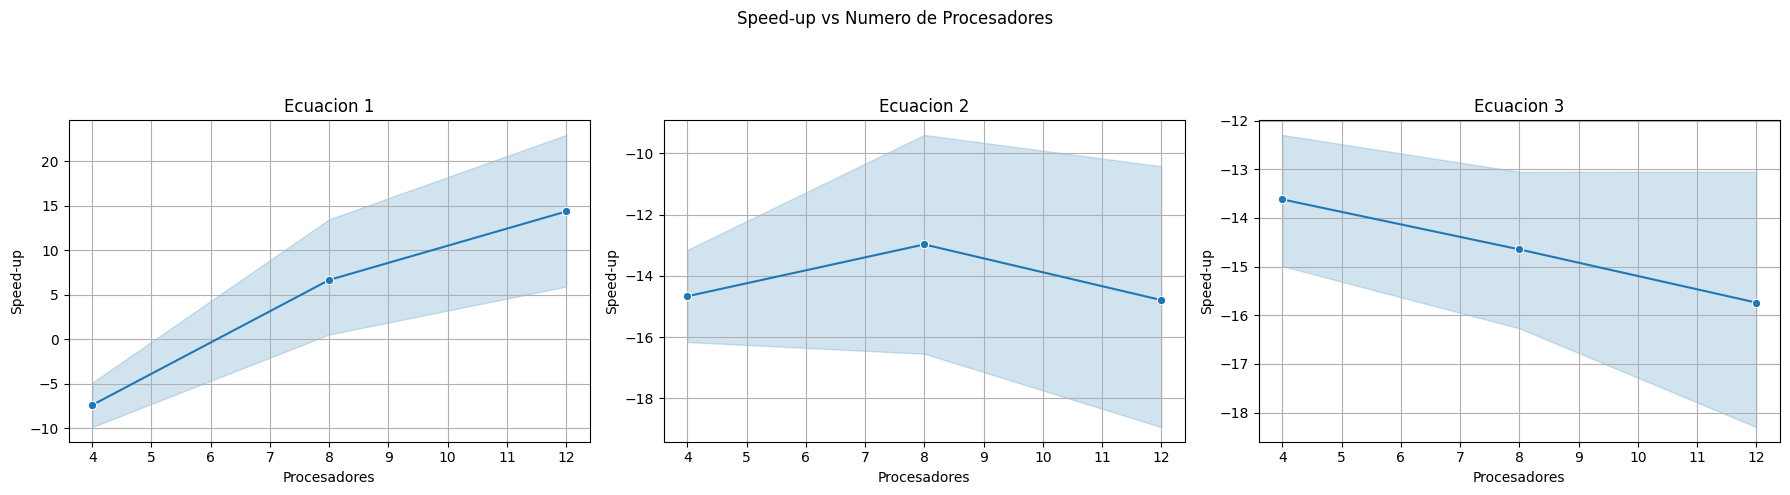

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=df1, x='n_processors', y='speed_up', marker='o', ax=axs[0])
axs[0].set_xlabel('Procesadores')
axs[0].set_ylabel('Speed-up')
axs[0].set_title('Ecuacion 1')
axs[0].grid()

sns.lineplot(data=df2, x='n_processors', y='speed_up', marker='o', ax=axs[1])
axs[1].set_xlabel('Procesadores')
axs[1].set_ylabel('Speed-up')
axs[1].set_title('Ecuacion 2')
axs[1].grid()

sns.lineplot(data=df3, x='n_processors', y='speed_up', marker='o', ax=axs[2])
axs[2].set_xlabel('Procesadores')
axs[2].set_ylabel('Speed-up')
axs[2].set_title('Ecuacion 3')
axs[2].grid()

fig.suptitle('Speed-up vs Numero de Procesadores')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


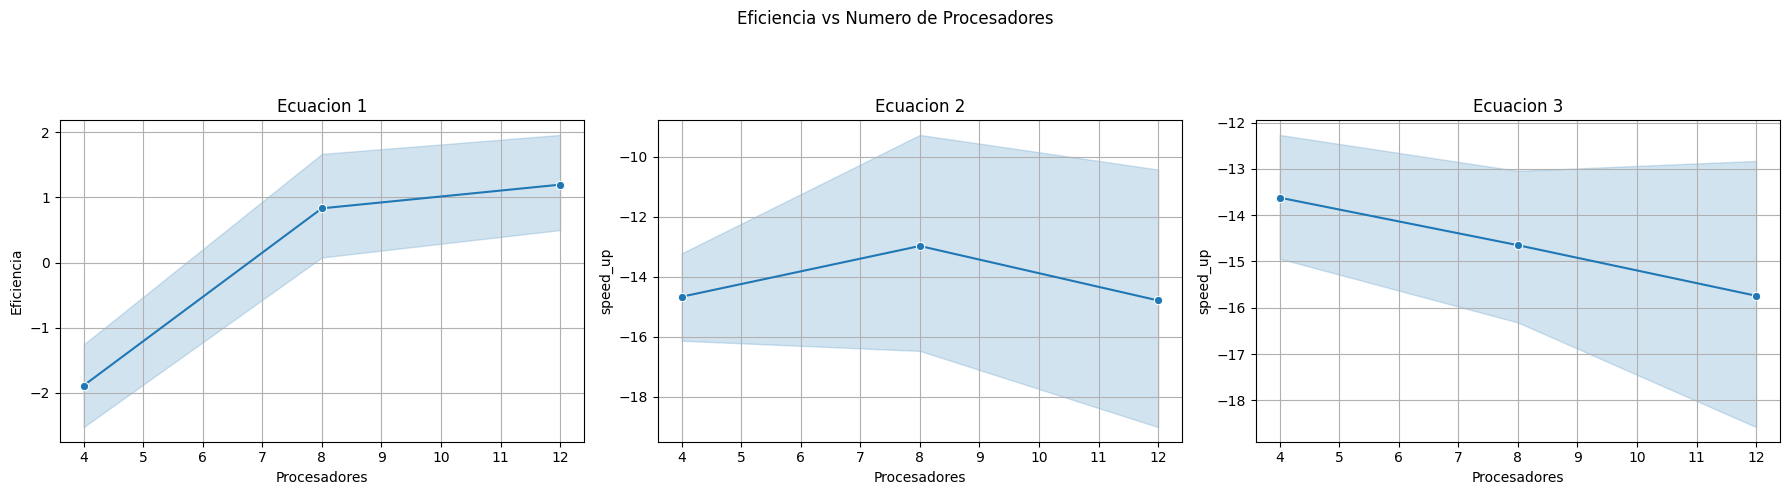

In [35]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=df1, x='n_processors', y='efficiency', marker='o', ax=axs[0])
axs[0].set_xlabel('Procesadores')
axs[0].set_ylabel('Eficiencia')
axs[0].set_title('Ecuacion 1')
axs[0].grid()

sns.lineplot(data=df2, x='n_processors', y='speed_up', marker='o', ax=axs[1])
axs[1].set_xlabel('Procesadores')
axs[0].set_ylabel('Eficiencia')
axs[1].set_title('Ecuacion 2')
axs[1].grid()

sns.lineplot(data=df3, x='n_processors', y='speed_up', marker='o', ax=axs[2])
axs[2].set_xlabel('Procesadores')
axs[0].set_ylabel('Eficiencia')
axs[2].set_title('Ecuacion 3')
axs[2].grid()

fig.suptitle('Eficiencia vs Numero de Procesadores')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\3832748057.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)
C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\3832748057.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)
C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\3832748057.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)


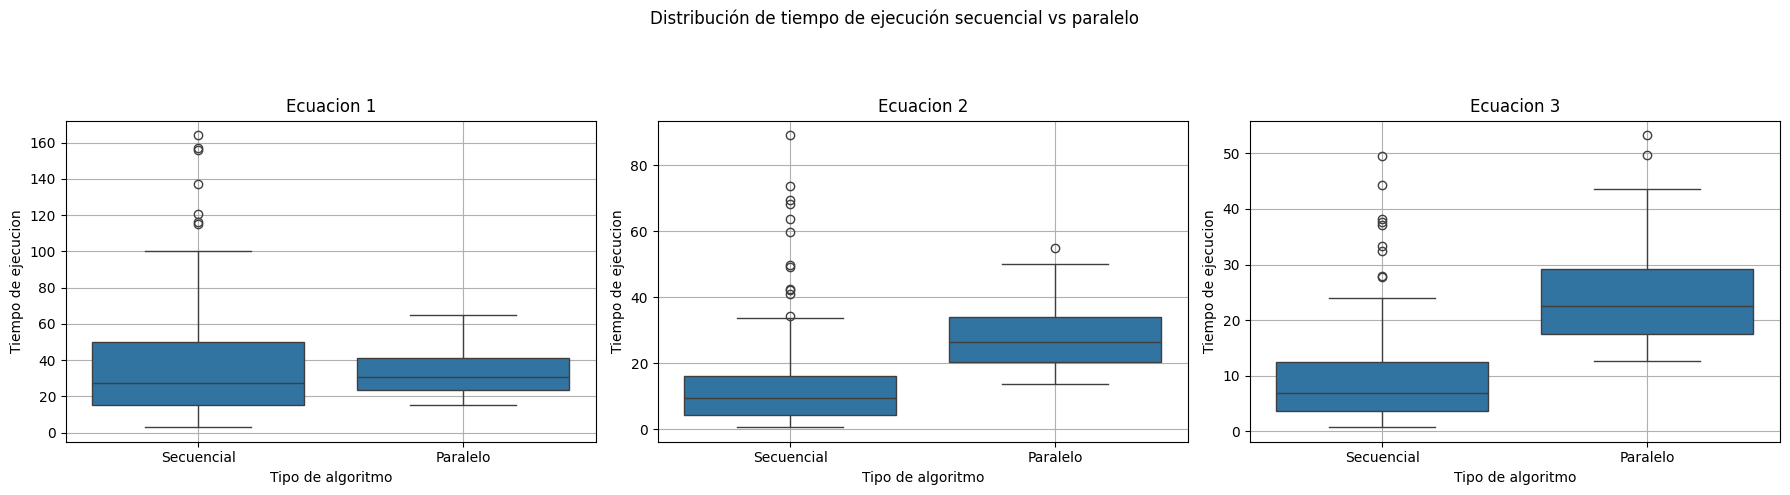

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# First
melted1 = df1.melt(id_vars=['algorithm'], 
                   value_vars=['sequential_time', 'parallel_time'], 
                   var_name='type', 
                   value_name='time')
sns.boxplot(data=melted1, x='type', y='time', ax=axs[0])
axs[0].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)
axs[0].set_xlabel('Tipo de algoritmo')
axs[0].set_ylabel('Tiempo de ejecucion')
axs[0].set_title('Ecuacion 1')
axs[0].grid()

# Second
melted2 = df2.melt(id_vars=['algorithm'], 
                   value_vars=['sequential_time', 'parallel_time'], 
                   var_name='type', 
                   value_name='time')
sns.boxplot(data=melted2, x='type', y='time', ax=axs[1])
axs[1].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)
axs[1].set_xlabel('Tipo de algoritmo')
axs[1].set_ylabel('Tiempo de ejecucion')
axs[1].set_title('Ecuacion 2')
axs[1].grid()

# Third
melted3 = df3.melt(id_vars=['algorithm'], 
                   value_vars=['sequential_time', 'parallel_time'],
                   var_name='type', 
                   value_name='time')
sns.boxplot(data=melted3, x='type', y='time', ax=axs[2])
axs[2].set_xticklabels(['Secuencial', 'Paralelo'], rotation=0)
axs[2].set_xlabel('Tipo de algoritmo')
axs[2].set_ylabel('Tiempo de ejecucion')
axs[2].set_title('Ecuacion 3')
axs[2].grid()

fig.suptitle('Distribución de tiempo de ejecución secuencial vs paralelo')
fig.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()




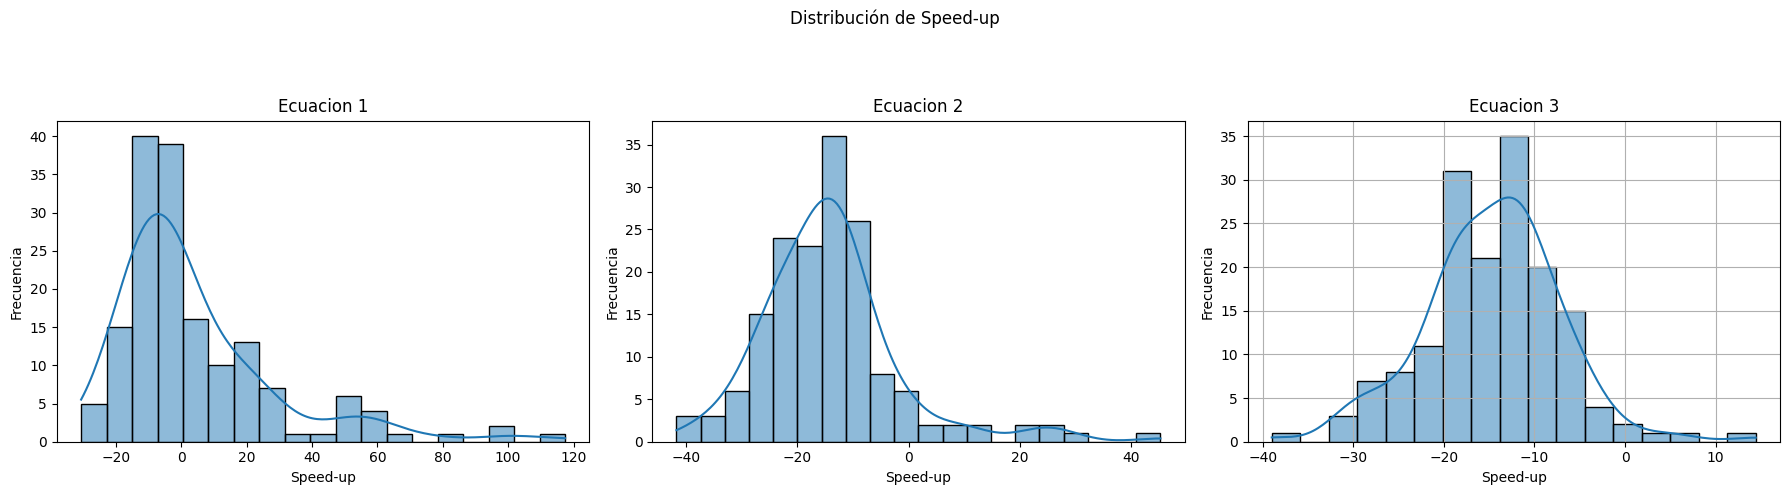

In [72]:


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df1, x='speed_up', kde=True, ax=axs[0])
axs[0].set_xlabel('Speed-up')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Ecuacion 1')
plt.grid()


sns.histplot(data=df2, x='speed_up', kde=True, ax=axs[1])
axs[1].set_xlabel('Speed-up')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Ecuacion 2')
plt.grid()


sns.histplot(data=df3, x='speed_up', kde=True, ax=axs[2])
axs[2].set_xlabel('Speed-up')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Ecuacion 3')
plt.grid()


fig.suptitle('Distribución de Speed-up')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

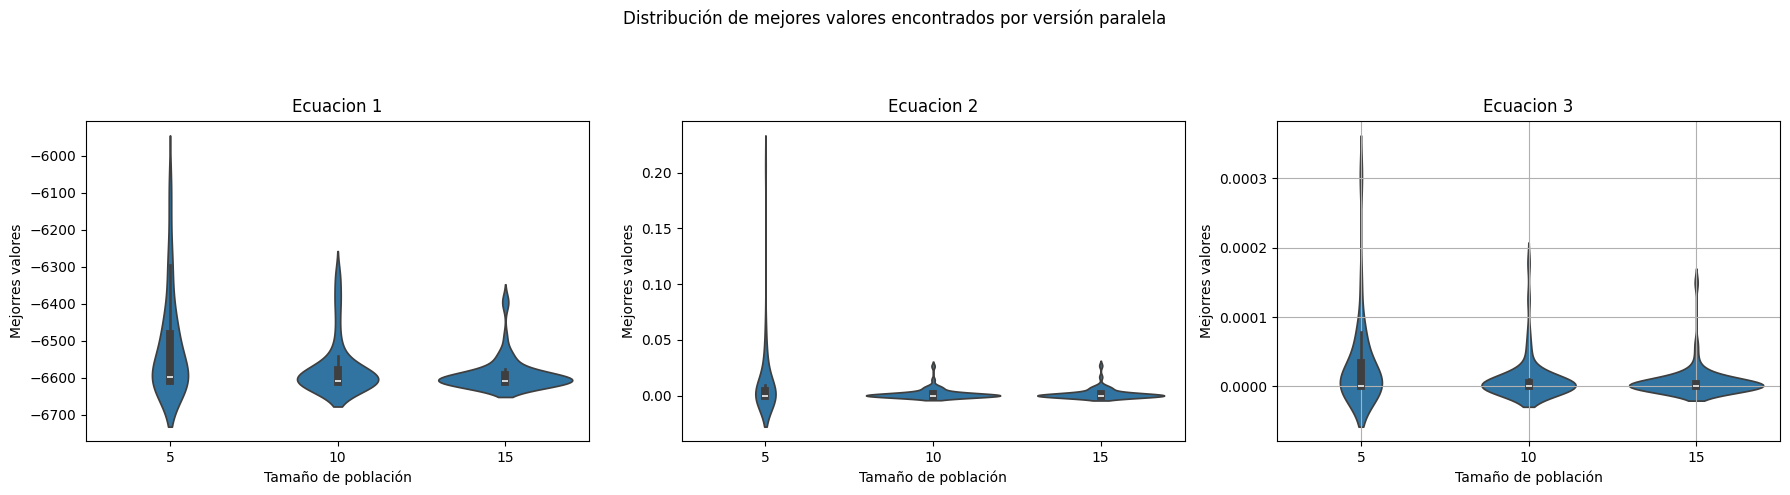

In [71]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(data=df1, x='population', y='parallel_best', ax=axs[0])
axs[0].set_xlabel('Tamaño de población')
axs[0].set_ylabel('Mejorres valores')
axs[0].set_title('Ecuacion 1')
plt.grid()


sns.violinplot(data=df2, x='population', y='parallel_best', ax=axs[1])
axs[1].set_xlabel('Tamaño de población')
axs[1].set_ylabel('Mejorres valores')
axs[1].set_title('Ecuacion 2')
plt.grid()


sns.violinplot(data=df3, x='population', y='parallel_best', ax=axs[2])
axs[2].set_xlabel('Tamaño de población')
axs[2].set_ylabel('Mejorres valores')
axs[2].set_title('Ecuacion 3')
plt.grid()


fig.suptitle('Distribución de mejores valores encontrados por versión paralela')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

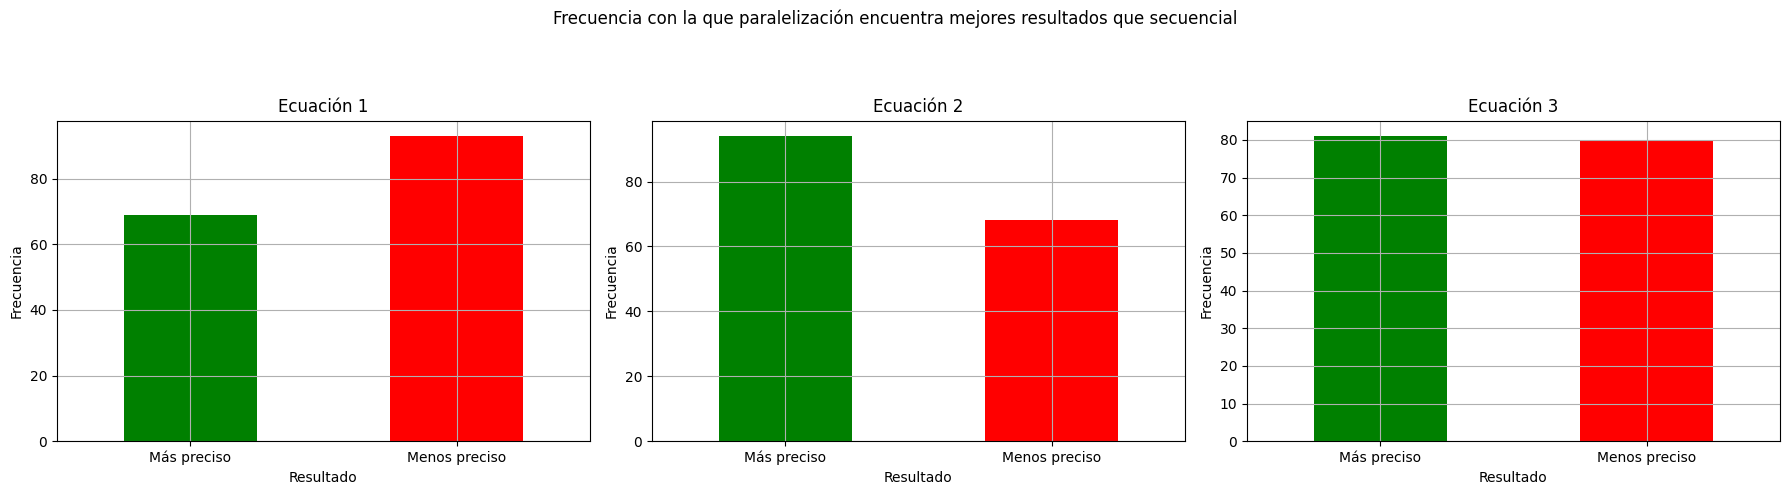

In [70]:

comp_counts1 = df1['comparison'].value_counts()

comp_counts2 = df2['comparison'].value_counts()

comp_counts3 = df3['comparison'].value_counts()

order = ['Better','Worse']

comp_counts1 = comp_counts1.reindex(order)
comp_counts2 = comp_counts2.reindex(order)
comp_counts3 = comp_counts3.reindex(order)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))


comp_counts1.plot(kind='bar', color=['green', 'red', 'grey'], ax=axs[0])
axs[0].set_xticklabels(['Más preciso', 'Menos preciso'], rotation=0)
axs[0].set_xlabel('Resultado')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Ecuación 1')
axs[0].grid()

comp_counts2.plot(kind='bar', color=['green', 'red', 'grey'], ax=axs[1])
axs[1].set_xticklabels(['Más preciso', 'Menos preciso'], rotation=0)
axs[1].set_xlabel('Resultado')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Ecuación 2')
axs[1].grid()

comp_counts3.plot(kind='bar', color=['green', 'red', 'grey'], ax=axs[2])
axs[2].set_xticklabels(['Más preciso', 'Menos preciso'], rotation=0)
axs[2].set_xlabel('Resultado')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Ecuación 3')
axs[2].grid()

fig.suptitle('Frecuencia con la que paralelización encuentra mejores resultados que secuencial')
fig.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()



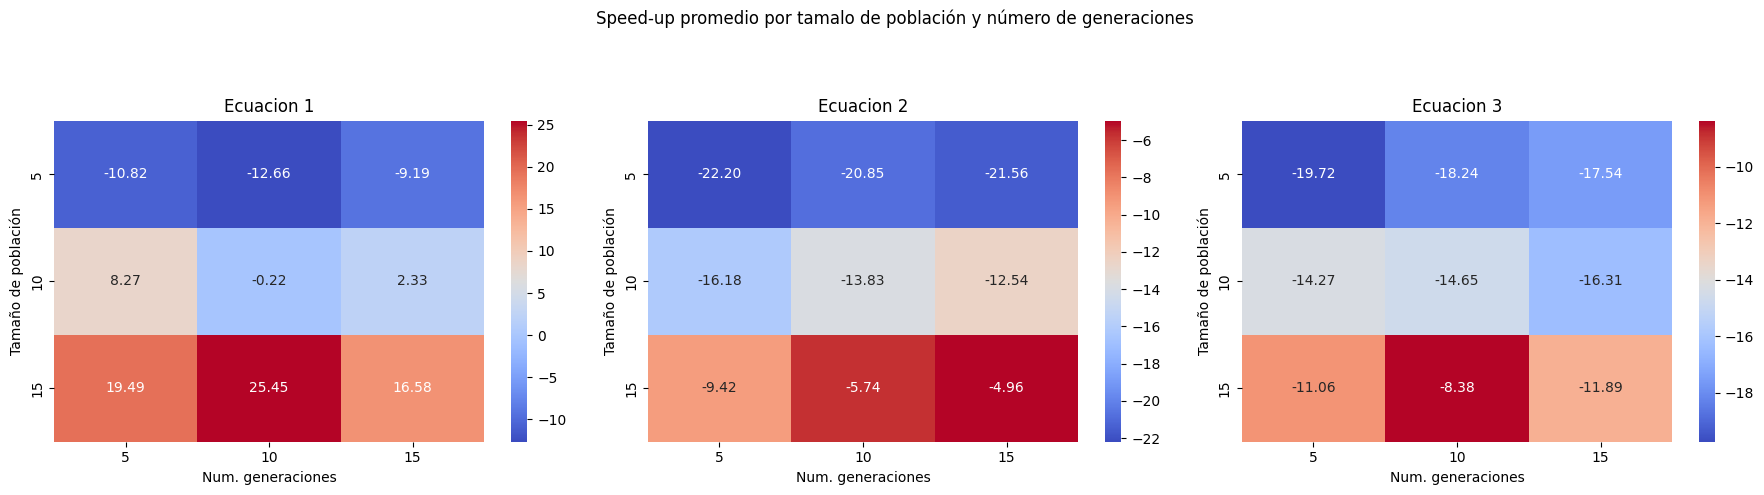

In [64]:
pivot1 = df1.pivot_table(values='speed_up', 
                       index='population', 
                       columns='generation', 
                       aggfunc='mean')

pivot2 = df2.pivot_table(values='speed_up', 
                       index='population', 
                       columns='generation', 
                       aggfunc='mean')

pivot3 = df3.pivot_table(values='speed_up', 
                       index='population', 
                       columns='generation', 
                       aggfunc='mean')





fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(pivot1, cmap='coolwarm', annot=True, fmt='.2f', ax=axs[0])
axs[0].set_title('Ecuacion 1')
axs[0].set_xlabel('Num. generaciones')
axs[0].set_ylabel('Tamaño de población')

sns.heatmap(pivot2, cmap='coolwarm', annot=True, fmt='.2f', ax=axs[1])
axs[1].set_title('Ecuacion 2')
axs[1].set_xlabel('Num. generaciones')
axs[1].set_ylabel('Tamaño de población')



sns.heatmap(pivot3, cmap='coolwarm', annot=True, fmt='.2f', ax=axs[2])
axs[2].set_title('Ecuacion 3')
axs[2].set_xlabel('Num. generaciones')
axs[2].set_ylabel('Tamaño de población')



fig.suptitle('Speed-up promedio por tamalo de población y número de generaciones')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

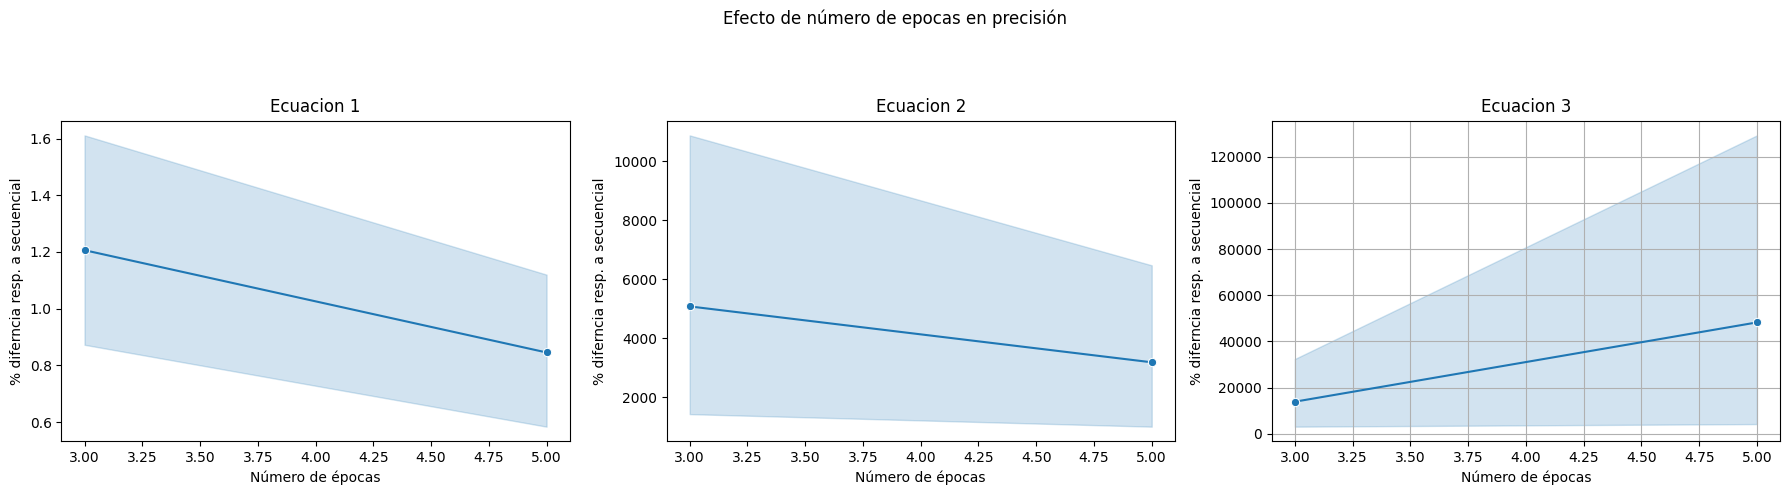

In [63]:


fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=df1, x='epochs', y='percent_difference', marker='o', ax=axs[0])
axs[0].set_title('Ecuacion 1')
axs[0].set_xlabel('Número de épocas')
axs[0].set_ylabel('% diferncia resp. a secuencial')
plt.grid()

sns.lineplot(data=df2, x='epochs', y='percent_difference', marker='o', ax=axs[1])
axs[1].set_title('Ecuacion 2')
axs[1].set_xlabel('Número de épocas')
axs[1].set_ylabel('% diferncia resp. a secuencial')
plt.grid()



sns.lineplot(data=df3, x='epochs', y='percent_difference', marker='o', ax=axs[2])
axs[2].set_title('Ecuacion 3')
axs[2].set_xlabel('Número de épocas')
axs[2].set_ylabel('% diferncia resp. a secuencial')
plt.grid()



fig.suptitle('Efecto de número de epocas en precisión')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()

C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\2255789754.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)
C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\2255789754.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)
C:\Users\AldoHernandez\AppData\Local\Temp\ipykernel_15316\2255789754.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)


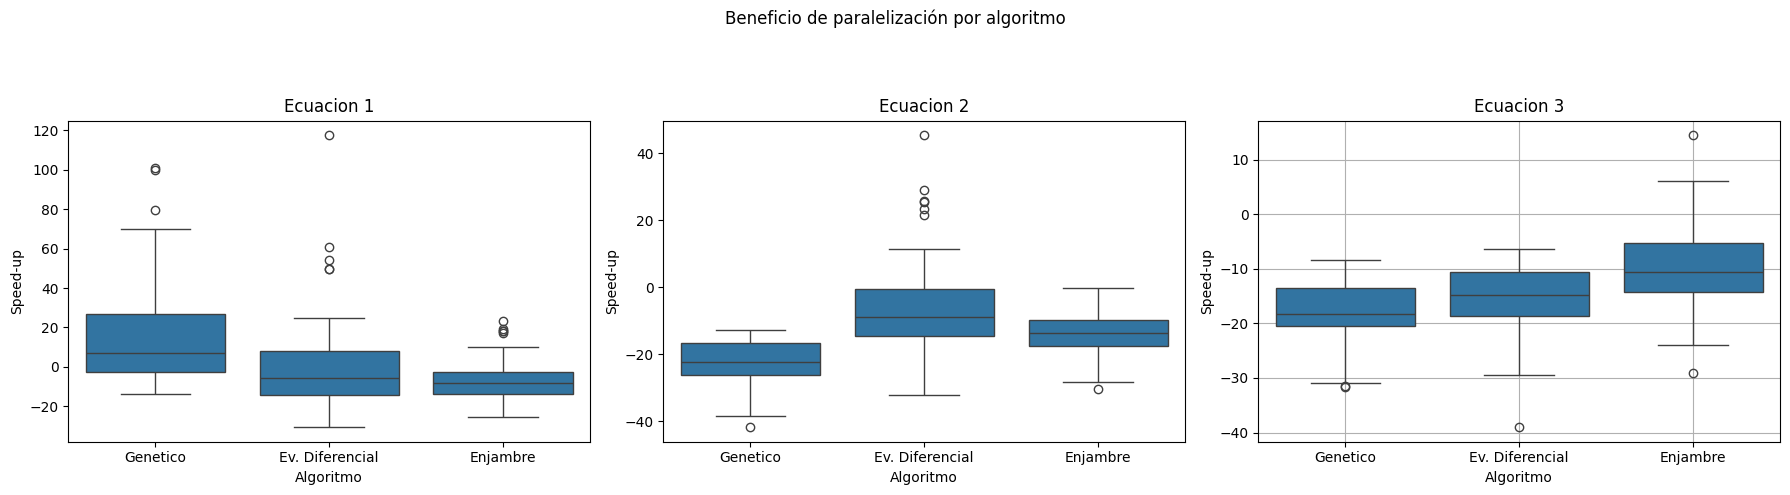

In [74]:



fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(data=df1, x='algorithm', y='speed_up', ax=axs[0])
axs[0].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)
axs[0].set_title('Ecuacion 1')
axs[0].set_xlabel('Algoritmo')
axs[0].set_ylabel('Speed-up')
plt.grid()

sns.boxplot(data=df2, x='algorithm', y='speed_up', ax=axs[1])
axs[1].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)
axs[1].set_title('Ecuacion 2')
axs[1].set_xlabel('Algoritmo')
axs[1].set_ylabel('Speed-up')
plt.grid()



sns.boxplot(data=df3, x='algorithm', y='speed_up', ax=axs[2])
axs[2].set_xticklabels(['Genetico', 'Ev. Diferencial', 'Enjambre'], rotation=0)
axs[2].set_title('Ecuacion 3')
axs[2].set_xlabel('Algoritmo')
axs[2].set_ylabel('Speed-up')
plt.grid()



fig.suptitle('Beneficio de paralelización por algoritmo')

fig.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()